In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

In [5]:
parametros = pd.read_csv('parametros_finais.csv', comment = '#')
aglomerado = pd.read_csv('final_5d.csv')

In [6]:
chi = parametros[parametros.Metodo == 'Chi']
beau = parametros[parametros.Metodo == 'Beauchamp']
dias = parametros[parametros.Metodo == 'DIAS2022']

In [7]:
dias

,Metodo,Age,ModDist
0,DIAS2022,9.2,12.06


In [8]:
dias.ModDist.item() - beau.ModDist.item()

0.2599999999999998

In [9]:
dias.ModDist.item() - chi.ModDist.item()

0.2599999999999998

In [10]:
cor, mag = aglomerado.bp_rp, aglomerado.phot_g_mean_mag

In [11]:
Av = 0.117
Ag = 0.83627*Av
E = (1.08337 - 0.63439)*Av

In [12]:
isocronas = pd.read_csv('../iso_gaia_clipped.csv')
isocrona_chi = isocronas[isocronas['logAge']==chi.Age.item()]
isocrona_beau = isocronas[isocronas['logAge']==beau.Age.item()]
isocrona_dias = isocronas[isocronas['logAge']==dias.Age.item()]

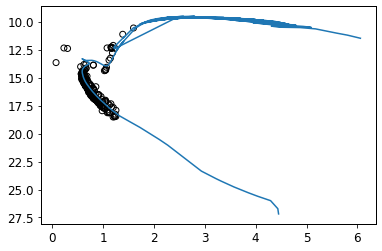

In [13]:
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(isocrona_chi['BP-RP'] + E, isocrona_chi['Gmag'] + Ag + chi.ModDist.item())
ax.invert_yaxis()

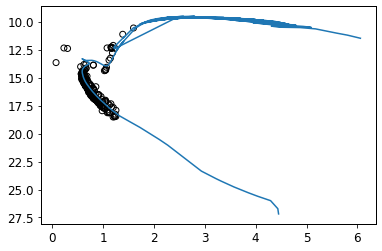

In [14]:
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(isocrona_beau['BP-RP'] + E, isocrona_beau['Gmag'] + Ag + beau.ModDist.item())
ax.invert_yaxis()

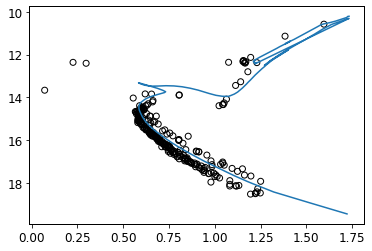

In [15]:
beau_clip = isocrona_beau.loc[isocrona_beau['BP-RP'] < max(cor) + 0.1]
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(beau_clip['BP-RP'] + E, beau_clip['Gmag'] + Ag + beau.ModDist.item())
ax.invert_yaxis()

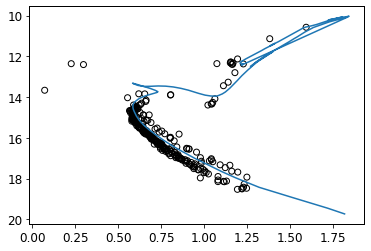

In [16]:
chi_clip = isocrona_chi.loc[isocrona_chi['BP-RP'] < max(cor) + 0.2]
fig, ax = plt.subplots()
ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(chi_clip['BP-RP'] + E, chi_clip['Gmag'] + Ag + chi.ModDist.item())
ax.invert_yaxis()

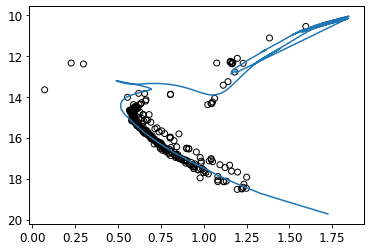

In [17]:
dias_clip = isocrona_dias.loc[isocrona_dias['BP-RP'] < max(cor) + 0.2]
fig, ax = plt.subplots()

ax.scatter(cor,mag, color = 'None', edgecolor = 'black')
ax.plot(dias_clip['BP-RP'] + E, dias_clip['Gmag'] + Ag + dias.ModDist.item())
ax.invert_yaxis()

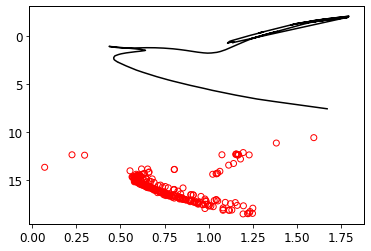

In [18]:
fig, ax = plt.subplots()

ax.scatter(cor,mag, color = 'None', edgecolor = 'red')
ax.plot(dias_clip['BP-RP'], dias_clip['Gmag'], color = 'k')
ax.invert_yaxis()

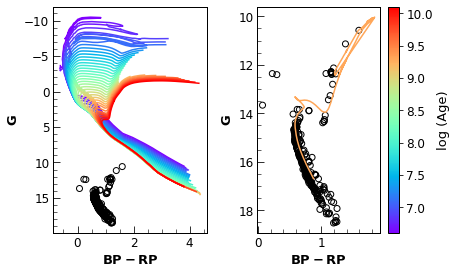

In [19]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))






age = [6.6 ,6.8, 7.2, 7.6, 8.0, 8.4, 8.6, 9.2, 9.6, 9.9]

idades = np.unique(isocronas['logAge'])

df = isocronas[isocronas.label < 4]

i = -1
j = 4


n = len(idades)
#colors = plt.cm.gist_ncar(np.linspace(0,1,n))
colors = plt.cm.rainbow(np.linspace(0,1,n))



for k in range(len(idades)):
    data = df[df['logAge'] == idades[k] ]
    ax1.plot(data['G_BPmag'][j:i]-data['G_RPmag'][j:i],data['Gmag'][j:i], linewidth = 1.5, color = colors[k])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)
ax1.invert_yaxis()
ax1.set_ylabel(r'$\mathbf{G}$')
ax1.set_xlabel(r'$\mathbf{BP - RP}$')


i = 13
ax1.scatter(cor,mag, color = 'None', edgecolor = 'k')
#ax1.plot(dias_clip['BP-RP'][i:], dias_clip['Gmag'][i:], color = 'k')
ax1.set_ylabel(r'$\mathbf{G}$')
ax1.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.scatter(cor,mag, color = 'None', edgecolor = 'k')
ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:] + Ag + chi.ModDist.item(), color  = colors[27])
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()

norm = mpl.colors.Normalize(vmin=6.6, vmax=10.1)
cb1 = plt.cm.ScalarMappable(norm = norm, cmap='rainbow')

fig.colorbar(cb1, label = 'log (Age)')

#plt.savefig('fit_isochrone.jpg', format = 'jpg', dpi = 300)
#plt.savefig('algorithm_idea.jpg', format = 'jpg', dpi = 300)

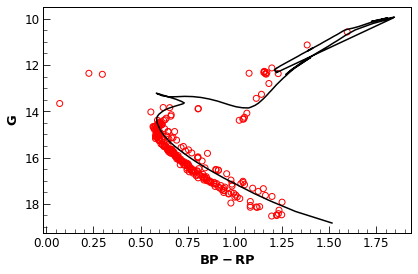

In [20]:
from matplotlib.ticker import AutoMinorLocator

fig, ax2 = plt.subplots()

i = 3


ax2.scatter(cor,mag, color = 'None', edgecolor = 'red')
ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:]  + chi.ModDist.item(), color  = 'k')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('ngc-2204-final.jpg', format = 'jpg', dpi = 300)

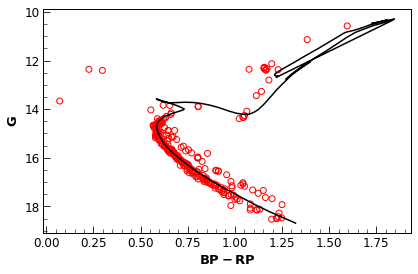

In [21]:
from matplotlib.ticker import AutoMinorLocator

fig, ax2 = plt.subplots()

i = 4


ax2.scatter(cor,mag, color = 'None', edgecolor = 'red')
ax2.plot(chi_clip['BP-RP'][i:] + E, chi_clip['Gmag'][i:]  + Ag + dias.ModDist.item(), color  = 'k')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')


ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
plt.savefig('ngc-2420-final.jpg', format = 'jpg', dpi = 300)

In [23]:
10**((-Ag + dias.ModDist.item())/5 + 1)

2468.4894872757004